<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1PdKgCi-cE3uerh47dV06n_t7xo5TqLDJ" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Trabajando con **histogramas**

In [ ]:
import os
import cv2
import cv2
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab.patches import cv2_imshow
from google.colab import files


## Algunas funcines de apoyo

In [ ]:
def subir_imagen():
    # Pedir al usuario que seleccione un archivo
    uploaded = files.upload()

    # Obtener el nombre del archivo y su contenido
    file_name = next(iter(uploaded))
    file_content = uploaded[file_name]

    # Definir el directorio donde se almacenará el archivo (en Google Colab)
    target_dir = '/content/imagenes'
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # Almacenar el archivo en el directorio especificado
    file_path = os.path.join(target_dir, file_name)
    with open(file_path, 'wb') as f:
        f.write(file_content)

    return file_path


In [ ]:
def leer_imagen(path):
    # Leer la imagen utilizando OpenCV
    image = cv2.imread(path)
    if image is None:
       raise ValueError("No se pudo leer la imagen. Asegúrate de que la ruta sea correcta y la imagen exista.")
    return image

## Cargando una imagen y mostrandola junto con su histograma

❗La imagen que cargemos será la usada en el resto del *notebook*.

Saving Captura de pantalla de 2018-11-12 21-01-49.png to Captura de pantalla de 2018-11-12 21-01-49 (1).png


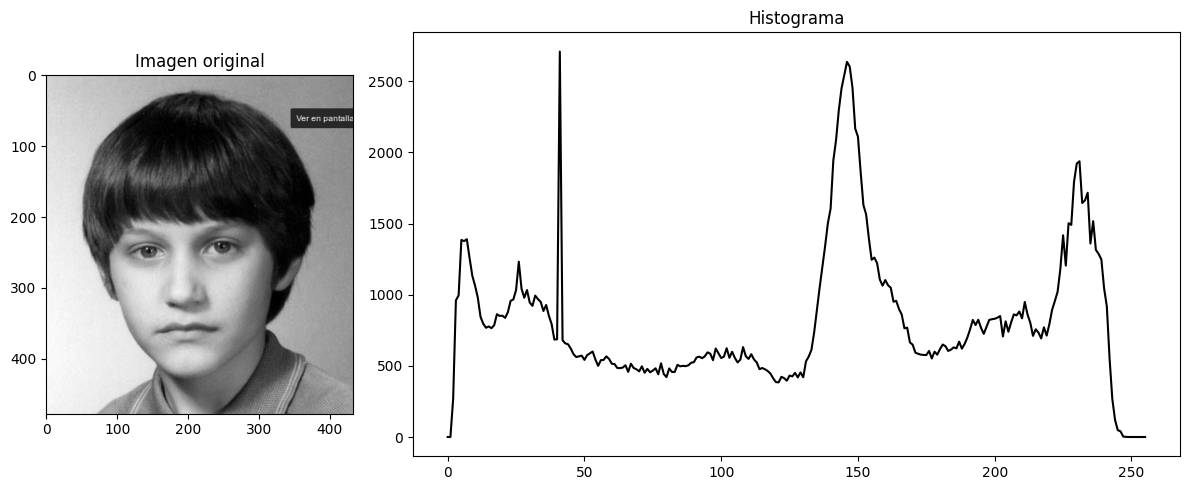

In [ ]:
# Llamar a la función para pedir el archivo y obtener el path almacenado
ruta = subir_imagen()

imagen_opencv = leer_imagen(ruta)

# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen_opencv, cv2.COLOR_BGR2GRAY)

# Calcular el histograma
histograma = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])

# Mostrar el histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [2, 5]})
ax1.imshow(imagen_gris, cmap='gray')
ax1.set_title('Imagen original')

ax2.plot(histograma, color='black')
ax2.set_title('Histograma')

plt.tight_layout()
plt.show()

## Modificando la imagen por medio de la manipulación del histograma

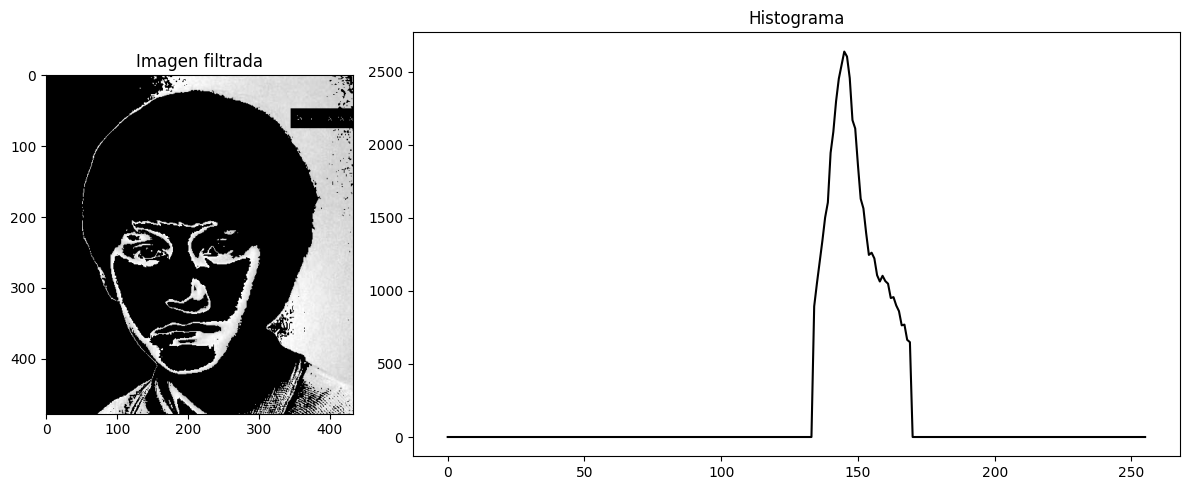

In [ ]:
filtro_inferior=135
filtro_superior=170
filtro_valor   =0

imagen_filtrada=imagen_gris.copy();
imagen_filtrada[imagen_gris<filtro_inferior]=filtro_valor;
imagen_filtrada[imagen_gris>filtro_superior]=filtro_valor;

# Calcular el histograma
histograma = cv2.calcHist([imagen_filtrada], [0], None, [256], [1, 256])

# Mostrar el histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [2, 5]})
ax1.imshow(imagen_filtrada, cmap='gray')
ax1.set_title('Imagen filtrada')

ax2.plot(histograma, color='black')
ax2.set_title('Histograma')

plt.tight_layout()
plt.show()

## Modificando el histograma interactivamente

### Instalando las librerías necesarias

In [ ]:
# tenemos que instalar algunas cosas antes de usarlas
!pip install -q ipycanvas==0.11
!pip install -q ipyevents

### Activando los widgets en Google Colab

In [ ]:
# esto es necesario en Google Colab para que funcionen los widgets
from google.colab import output
output.enable_custom_widget_manager()

### Interactuando

Se trata de hacer un *filtro-paso-banda* en el histograma.

Para ello vamos a crear un *slider* que permita editar dos valores, el valor inferior (**fmin**) y superior del filtro (**fmax**).

Básicamente todo pixel con un valor inferior a **fmin** será puesto a cero (negro), y todo pixel con valor superior a **fmax** será puesto a 255 (blanco).

Si quieres cambiar el valor a poner, en vez de cero por el valor que quieras (entre 0 y 255) en las líneas 25 y 26.

In [ ]:
from ipycanvas  import Canvas;

assert len(imagen_gris.shape)==2, "La imagen debe ser en tonos de grisis, y por tanto sólo un canal de color"

alto, ancho = imagen_gris.shape
canvas = Canvas(width=ancho, height=alto)
canvas.put_image_data(imagen_gris, 0, 0)
display(canvas);

slider=widgets.IntRangeSlider(value=[0, 255],
                              min=0,
                              max=255,
                              step=1,
                              description='Valores:',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal',
                              readout=True,
                              readout_format='d',
                              layout={"width":f"{ancho}px"})

def slider_changed(value):
    fmn, fmx = value.new
    imagen_filtrada = imagen_gris.copy()
    imagen_filtrada[imagen_gris<fmn]=0;
    imagen_filtrada[imagen_gris>fmx]=255;
    canvas.put_image_data(imagen_filtrada, 0, 0)

slider.observe(slider_changed, names='value')
display(slider);

# NOTA: debes arrastrar los puntos del slider, no llega con hacer click en un valor!

Canvas(height=478, width=433)

IntRangeSlider(value=(0, 255), continuous_update=False, description='Valores:', layout=Layout(width='433px'), …